In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image


In [ ]:

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MalariaCells-2/training_set',
                                                target_size=(64, 64),  # Set the target size (width, height) for resizing
                                                batch_size=275,
                                                class_mode='binary')  # For binary classification. Use 'categorical' for multi-class


Found 6965 images belonging to 2 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MalariaCells-2/testing_set',
                                            target_size=(64, 64),
                                            batch_size=150,
                                            class_mode='binary')




Found 0 images belonging to 2 classes.


In [ ]:


model = Sequential([
    Conv2D(filters=8, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid'),
    Dropout(0.1)
])


In [ ]:

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MalariaCells-2/training_set',
                                                target_size=(64, 64),  # Set the target size (width, height) for resizing
                                                batch_size=220,
                                                class_mode='binary',
                                                subset='training')  # For binary classification. Use 'categorical' for multi-class

validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MalariaCells-2/training_set',
                                                target_size=(64, 64),  # Set the target size (width, height) for resizing
                                                batch_size=50,
                                                class_mode='binary',
                                                subset='validation')  # For binary classification. Use 'categorical' for multi-class


test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MalariaCells-2/testing_set',
                                            target_size=(64, 64),
                                            batch_size=150,
                                            class_mode='binary')


model = Sequential([
    Conv2D(filters=8, kernel_size=(3, 3), input_shape=(64, 64, 3)),
    BatchNormalization(),  # Add BatchNormalization after Conv2D
    Activation('relu'),    # Add Activation layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=8, kernel_size=(3, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Add BatchNormalization after Conv2D
    Activation('relu'),    # Add Activation layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=16, kernel_size=(3, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Add BatchNormalization after Conv2D
    Activation('relu'),    # Add Activation layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=16, kernel_size=(3, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Add BatchNormalization after Conv2D
    Activation('relu'),    # Add Activation layer
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1, activation='sigmoid'),
    Dropout(0.1)
])


model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision')])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)

# Train the model
model.fit(training_set, epochs=10,validation_data=validation_set,
                    callbacks=[reduce_lr])

model.evaluate(test_set)

print(f"Test accuracy: {accuracy:.4f}")

Found 6316 images belonging to 2 classes.
Found 1579 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 8)         224       
                                                                 
 batch_normalization_4 (Batc  (None, 62, 62, 8)        32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 8)         584     

ValueError: ignored

Epoch 1/10
29/29 [==============================] - 38s 1s/step - loss: 1.7603 - accuracy: 0.8996 - precision: 1.0000 - val_loss: 0.4286 - val_accuracy: 1.0000 - val_precision: 1.0000 - lr: 4.0000e-05
Epoch 2/10
29/29 [==============================] - 34s 1s/step - loss: 1.8046 - accuracy: 0.8966 - precision: 1.0000 - val_loss: 0.3584 - val_accuracy: 1.0000 - val_precision: 1.0000 - lr: 4.0000e-05
Epoch 3/10
29/29 [==============================] - 35s 1s/step - loss: 1.7828 - accuracy: 0.8979 - precision: 1.0000 - val_loss: 0.3094 - val_accuracy: 1.0000 - val_precision: 1.0000 - lr: 4.0000e-05
Epoch 4/10
29/29 [==============================] - 33s 1s/step - loss: 1.7366 - accuracy: 0.9007 - precision: 1.0000 - val_loss: 0.2761 - val_accuracy: 1.0000 - val_precision: 1.0000 - lr: 4.0000e-05
Epoch 5/10
29/29 [==============================] - 33s 1s/step - loss: 1.6953 - accuracy: 0.9033 - precision: 1.0000 - val_loss: 0.2537 - val_accuracy: 1.0000 - val_precision: 1.0000 - lr: 4.0000

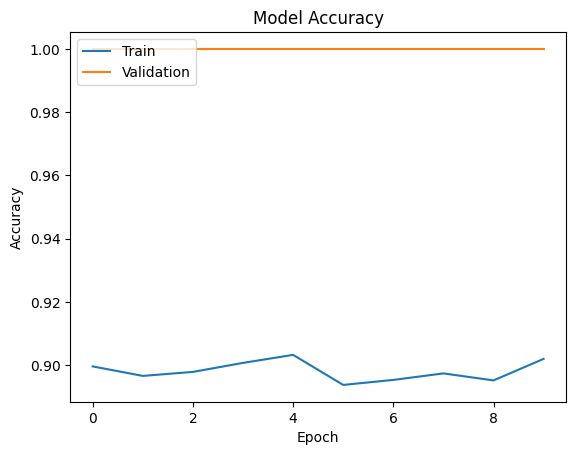

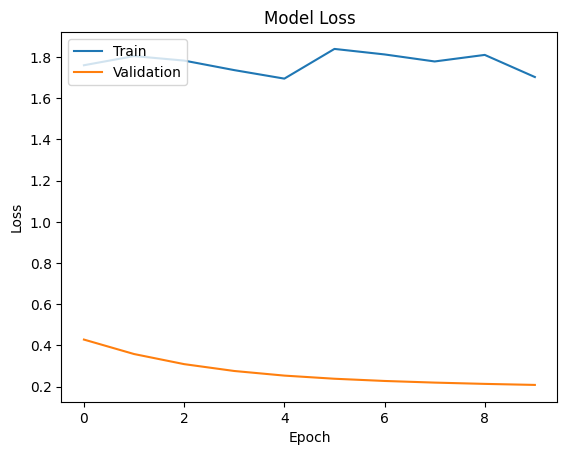

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(training_set, epochs=10, validation_data=validation_set, callbacks=[reduce_lr])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
